In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\python\Scaler\Case STUDY\walmart_data.csv")
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
df.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [9]:
len(df['Product_ID'].unique())

3631

In [10]:
df['Product_ID'].nunique()

3631

In [11]:
df['Product_Category'].nunique()

20

In [12]:
df['Occupation'].nunique()

21

In [13]:
df['Marital_Status'].nunique()

2

In [14]:
columns=['Occupation','Marital_Status', 'Product_Category']
df[columns]=df[columns].astype('object')

In [15]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [16]:
df['Marital_Status'].head()

0    0
1    0
2    0
3    0
4    0
Name: Marital_Status, dtype: object

In [17]:
def marital_status(x): 
    if x==0: 
        return "Unmarried"
    else: 
        return "Married"
    
df['Marital_Status']=df['Marital_Status'].apply(marital_status)


In [19]:
df['Marital_Status'].unique()

array(['Unmarried', 'Married'], dtype=object)

In [20]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

pd.melt(df[categorical_cols],value_vars=categorical_cols).groupby(['variable', 'value'])[['value']].count()/len(df[categorical_cols])

value
variable                   value              
Age                        0-17       0.027455
                           18-25      0.181178
                           26-35      0.399200
                           36-45      0.199999
                           46-50      0.083082
                           51-55      0.069993
                           55+        0.039093
City_Category              A          0.268549
                           B          0.420263
                           C          0.311189
Gender                     F          0.246895
                           M          0.753105
Marital_Status             Married    0.409653
                           Unmarried  0.590347
Occupation                 0          0.126599
                           1          0.086218
                           2          0.048336
                           3          0.032087
                           4          0.131453
                           5          0.022137
                           6          0.037005
                           7          0.107501
                           8          0.002811
                           9          0.011437
                           10         0.023506
                           11         0.021063
                           12         0.056682
                           13         0.014049
                           14         0.049647
                           15         0.022115
                           16         0.046123
                           17         0.072796
                           18         0.012039
                           19         0.015382
                           20         0.061014
Product_Category           1          0.255201
                           2          0.043384
                           3          0.036746
                           4          0.021366
                           5          0.274390
                           6          0.037206
                           7          0.006765
                           8          0.207111
                           9          0.000745
                           10         0.009317
                           11         0.044153
                           12         0.007175
                           13         0.010088
                           14         0.002769
                           15         0.011435
                           16         0.017867
                           17         0.001051
                           18         0.005681
                           19         0.002914
                           20         0.004636
Stay_In_Current_City_Years 0          0.135252
                           1          0.352358
                           2          0.185137
                           3          0.173224
                           4+         0.154028

- In the city, there's a diverse demographic, with 80% of users falling into the age bracket of 18-50 years. This includes a substantial 40% in the 26-35 age range, followed by 20% between 36-45 and 18% in the 18-25 category.
- Regarding marital status, the community is split into 60% single individuals and 40% who are married.
- The gender distribution among users shows a majority of 75% male and 25% female.
- Residents have varied lengths of stay in the city, with 35% having lived there for a year, 18% for two years, and 17% for three years.
- The city is bustling with activity, featuring 20 different product categories for its inhabitants.
- Occupationally, the city is home to 20 unique types of jobs, highlighting its diverse professional landscape.

In [ ]:
df.columns

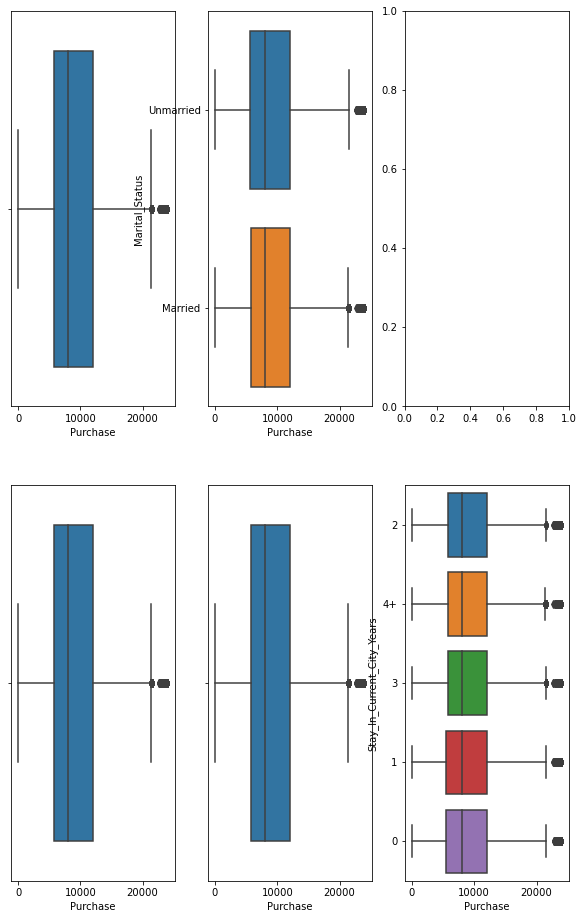

In [24]:
fig, ax=plt.subplots(2,3, figsize=(10,16))
sns.boxplot(data=df, x='Purchase', ax=ax[0,0])
sns.boxplot(data=df, x='Purchase', y="Marital_Status", ax=ax[0,1])
sns.boxplot(data=df, x='Purchase', hue="Occupation",ax=ax[1,0])
sns.boxplot(data=df, x='Purchase', hue="City_Category",ax=ax[1,1])
sns.boxplot(data=df, x='Purchase', y="Stay_In_Current_City_Years", ax=ax[1,2])
plt.show()

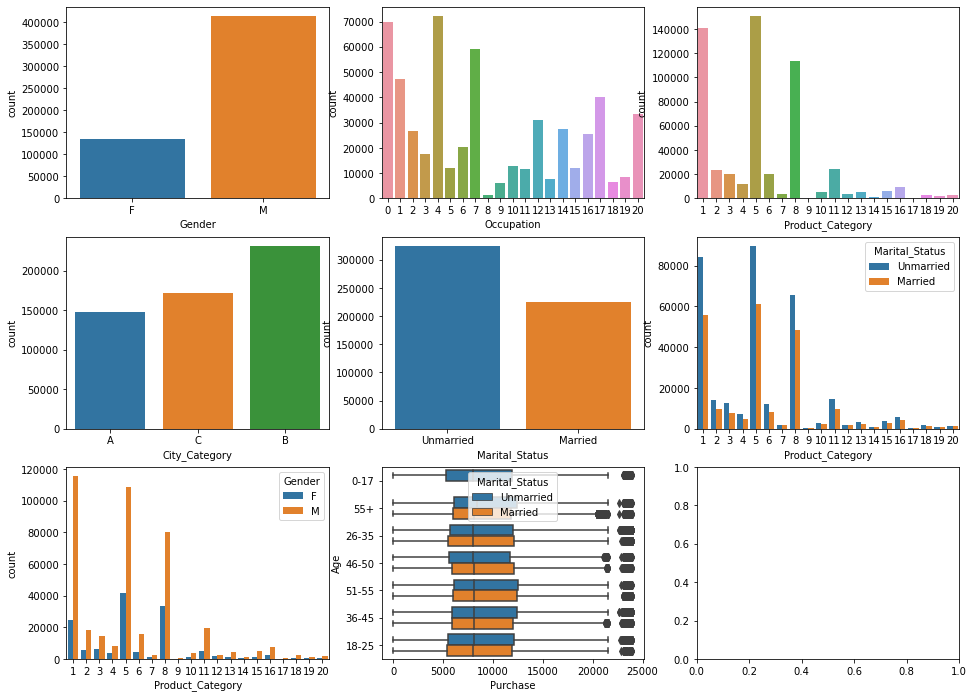

In [35]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, ax = plt.subplots(3, 3, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=ax[0,0])
sns.countplot(data=df, x='Occupation', ax=ax[0,1])
sns.countplot(data=df, x='City_Category', ax=ax[1,0])
sns.countplot(data=df, x='Marital_Status', ax=ax[1,1])
sns.countplot(data=df, x='Product_Category', ax=ax[0,2])
sns.countplot(data=df, x='Product_Category', hue='Marital_Status', ax=ax[1,2])
sns.countplot(data=df, x='Product_Category', hue='Gender', ax=ax[2,0])
sns.boxplot(data=df, x='Purchase',y='Age', hue='Marital_Status', ax=ax[2,1])
plt.show()


In [31]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')


Insights Gathered:

- The user base predominantly consists of males.
- The dataset encompasses a diverse range of 20 distinct occupations and product categories.
- The majority of users hail from cities classified under category B.
- Single users outnumber their married counterparts in terms of frequency.
- Product categories 1, 5, 8, and 11 emerge as the most popular in terms of purchase frequency.
-Quantity of males liking the product is more for example the most loved product 1,5,8, 11 are most liked by both males and females but males liked the product more
-Accorss all age groups the purchase is between 5000-12000 irrespective of their marital status but they do have outliers 

1.How does gender affect the amount spent?
2.Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
3.Intervals for the average amount spent per gender. First, compute the confidence
4. nterval for whatever data is available, and then repeat the same with smaller sample sizes - 300, 3000, and 30000.  From the above calculated CLT answer the following questions.
5. Is the confidence interval computed using the entire dataset wider for
6. one of the genders? Why is this the case?
7. How is the width of the confidence interval affected by the sample size?
8. Do the confidence intervals for different sample sizes overlap?
9. How does the sample size affect the shape of the distributions of the means?

In [57]:
from scipy.stats import ttest_rel,ttest_ind, ttest_1samp, t

In [59]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [58]:
alpha=0.05
t.ppf(1-alpha/2, df=299)

1.9679296690653618

In [127]:
def central_limit_approach(df):
    genders = df['Gender'].unique()
    sample_sizes = [300, 3000, 30000]
    results_mean_cl=pd.DataFrame()
    for gender in genders: 
        gender_data=df[df['Gender']==gender]['Purchase']
        #print(gender_data.shape)
        for size in sample_sizes: 
            if size<30:
                print("Not possible at least the select a large population size")
            else: 
                sample=gender_data.sample(n=size, random_state=101)
            sample_mean=sample.mean()
            sample_std=sample.std(ddof=1)
            confidence_level=0.95
            alpha=1-confidence_level
            t_critical = t.ppf(1 - alpha/2, df=size-1) # as our sample std is unknown so we are using t score
            margin_of_error = t_critical * (sample_std / np.sqrt(size))
            upper_bound=sample_mean+margin_of_error
            lower_bound=sample_mean-margin_of_error
            results={"size": size, "Gender":gender,"lower_bound":lower_bound, "upper_bound": upper_bound}
            results_mean_cl=results_mean_cl.append(results, ignore_index=True)
    return results_mean_cl

central_limit_approach(df)

,size,Gender,lower_bound,upper_bound
0,300.0,F,8057.901791,9062.718209
1,3000.0,F,8574.183385,8914.336615
2,30000.0,F,8701.617916,8809.578684
3,300.0,M,8693.021075,9875.325592
4,3000.0,M,9207.118665,9570.596001
5,30000.0,M,9396.520662,9511.862205


In [120]:
def bootstrapping(data, n_bootstraps=10000, confidence_level=0.95): 
    sizes=[300,3000,30000]
    print((1 + confidence_level) / 2*100)
    print((1 - confidence_level) / 2*100)
    bootstrap_final=pd.DataFrame()
    genders=df['Gender'].unique()
    for gender in genders:
        gender_data = df[df['Gender'] == gender]['Purchase']
        for size in sizes:
            bootstraps_means=[np.mean(np.random.choice(gender_data, replace=True, size=size)) for i in range(n_bootstraps)]  
            print(f"new :{len(bootstraps_means)} means added for for size: {size} gender: {gender}")
            lower_bound=np.percentile(bootstraps_means, (1-confidence_level)/2*100)
            upper_bound=np.percentile(bootstraps_means, (1+confidence_level)/2*100)
            results={'Gender': gender, 'Size': size, 'lower': lower_bound, 'upper': upper_bound}
            bootstrap_final=bootstrap_final.append(results, ignore_index=True)
    #print(bootstrap_final)
    return bootstrap_final
bootstrapping(df)

97.5
2.500000000000002
new :10000 means added for for size: 300 gender: F
new :10000 means added for for size: 3000 gender: F
new :10000 means added for for size: 30000 gender: F
new :10000 means added for for size: 300 gender: M
new :10000 means added for for size: 3000 gender: M
new :10000 means added for for size: 30000 gender: M


,Gender,Size,lower,upper
0,F,300.0,8204.211750,9278.495083
1,F,3000.0,8566.993567,8907.188933
2,F,30000.0,8679.695439,8788.670317
3,M,300.0,8861.060333,10024.355250
4,M,3000.0,9258.480250,9618.409542
5,M,30000.0,9381.159986,9494.356180


Now we can say about the population that, 95% of the times:

bootstrapping: 
    
Average amount spend by male customer will lie in between: (9381.159986, 9494.356180)
Average amount spend by female customer will lie in between: (8679.695439,8788.670317)
    
central_limit_approach: 
    
Average amount spend by male customer will lie in between: (9396.520662, 9511.862205)
Average amount spend by female customer will lie in between: (8701.617916,8809.578684)

- We can use any of them i wanted to see the results for both so used both approach

How does Marital_Status affect the amount spent?
Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
intervals for the average amount spent per Marital_Status. First, compute the
confidence interval for whatever data is available, and then repeat the same with
smaller sample sizes - 300, 3000, and 30000.
a. From the above calculated CLT answer the following questions.
i. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?
ii. How is the width of the confidence interval affected by the sample size?
iii. Do the confidence intervals for different sample sizes overlap?
iv. How does the sample size affect the shape of the distributions of the
means?

In [124]:
df['Marital_Status'].uniquee()

array(['Unmarried', 'Married'], dtype=object)

In [128]:
def central_limit_approach(df):
    Marital_Statuses = df['Marital_Status'].unique()
    sample_sizes = [300, 3000, 30000]
    results_mean_cl=pd.DataFrame()
    for Marital_Status in Marital_Statuses: 
        data=df[df['Marital_Status']==Marital_Status]['Purchase']
        for size in sample_sizes: 
            if size<30:
                print("Not possible at least the select a large population size")
            else: 
                sample=data.sample(n=size, random_state=101)
            sample_mean=sample.mean()
            sample_std=sample.std(ddof=1)
            confidence_level=0.95
            alpha=1-confidence_level
            t_critical = t.ppf(1 - alpha/2, df=size-1) # as our sample std is unknown so we are using t score
            margin_of_error = t_critical * (sample_std / np.sqrt(size))
            upper_bound=sample_mean+margin_of_error
            lower_bound=sample_mean-margin_of_error
            results={"size": size, "Marital_Status":Marital_Status,"lower_bound":lower_bound, "upper_bound": upper_bound}
            results_mean_cl=results_mean_cl.append(results, ignore_index=True)
    return results_mean_cl

central_limit_approach(df)

,size,Marital_Status,lower_bound,upper_bound
0,300.0,Unmarried,9250.105521,10377.027812
1,3000.0,Unmarried,9191.381463,9552.635871
2,30000.0,Unmarried,9200.487469,9314.022398
3,300.0,Married,8943.413498,10156.706502
4,3000.0,Married,9167.059112,9530.481555
5,30000.0,Married,9173.693863,9287.083071


In [142]:
def bootstrapping(data, Column,n_bootstraps=10000, confidence_level=0.95 ): 
    sizes=[300,3000,30000]
    print((1 + confidence_level) / 2*100)
    print((1 - confidence_level) / 2*100)
    bootstrap_final=pd.DataFrame()
    types=df[Column].unique()
    for type in types:
        data = df[df[Column] == type]['Purchase']
        for size in sizes:
            bootstraps_means=[np.mean(np.random.choice(data, replace=True, size=size)) for i in range(n_bootstraps)]  
            print(f"new :{len(bootstraps_means)} means added for for size: {size} for {type}")
            lower_bound=np.percentile(bootstraps_means, (1-confidence_level)/2*100)
            upper_bound=np.percentile(bootstraps_means, (1+confidence_level)/2*100)
            results={Column: type, 'Size': size, 'lower': lower_bound, 'upper': upper_bound}
            bootstrap_final=bootstrap_final.append(results, ignore_index=True)
    #print(bootstrap_final)
    return bootstrap_final
bootstrapping(df, Column='Marital_Status')

97.5
2.500000000000002
new :10000 means added for for size: 300 for Unmarried
new :10000 means added for for size: 3000 for Unmarried
new :10000 means added for for size: 30000 for Unmarried
new :10000 means added for for size: 300 for Married
new :10000 means added for for size: 3000 for Married
new :10000 means added for for size: 30000 for Married


,Marital_Status,Size,lower,upper
0,Unmarried,300.0,8713.569667,9831.250500
1,Unmarried,3000.0,9087.087092,9445.489325
2,Unmarried,30000.0,9209.170706,9322.150275
3,Married,300.0,8695.551500,9835.145250
4,Married,3000.0,9082.363225,9441.161158
5,Married,30000.0,9203.914822,9318.535754


Now we can say about the population that, 95% of the times:

bootstrapping:

Average amount spend by Married customer will lie in between: (9204.933711	, 9318.758526)
Average amount spend by Unmarried customer will lie in between: (9209.653077,	9323.454164)

How does Age affect the amount spent?

Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
intervals for the average amount spent per Marital_Status. First, compute the
confidence interval for whatever data is available, and then repeat the same with
smaller sample sizes - 300, 3000, and 30000.
a. From the above calculated CLT answer the following questions.
i. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?
ii. How is the width of the confidence interval affected by the sample size?
iii. Do the confidence intervals for different sample sizes overlap?
iv. How does the sample size affect the shape of the distributions of the
means?

In [137]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [140]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [143]:
def bootstrapping(data, Column,n_bootstraps=10000, confidence_level=0.95 ): 
    sizes=[300,3000,30000]
    print((1 + confidence_level) / 2*100)
    print((1 - confidence_level) / 2*100)
    bootstrap_final=pd.DataFrame()
    types=df[Column].unique()
    for type in types:
        data = df[df[Column] == type]['Purchase']
        for size in sizes:
            bootstraps_means=[np.mean(np.random.choice(data, replace=True, size=size)) for i in range(n_bootstraps)]  
            print(f"new :{len(bootstraps_means)} means added for for size: {size} for {Column}")
            lower_bound=np.percentile(bootstraps_means, (1-confidence_level)/2*100)
            upper_bound=np.percentile(bootstraps_means, (1+confidence_level)/2*100)
            results={Column: type, 'Size': size, 'lower': lower_bound, 'upper': upper_bound}
            bootstrap_final=bootstrap_final.append(results, ignore_index=True)
    #print(bootstrap_final)
    return bootstrap_final
bootstrapping(df, Column='Marital_Status')

97.5
2.500000000000002
new :10000 means added for for size: 300 for 0-17
new :10000 means added for for size: 3000 for 0-17
new :10000 means added for for size: 30000 for 0-17
new :10000 means added for for size: 300 for 55+
new :10000 means added for for size: 3000 for 55+
new :10000 means added for for size: 30000 for 55+
new :10000 means added for for size: 300 for 26-35
new :10000 means added for for size: 3000 for 26-35
new :10000 means added for for size: 30000 for 26-35
new :10000 means added for for size: 300 for 46-50
new :10000 means added for for size: 3000 for 46-50
new :10000 means added for for size: 30000 for 46-50
new :10000 means added for for size: 300 for 51-55
new :10000 means added for for size: 3000 for 51-55
new :10000 means added for for size: 30000 for 51-55
new :10000 means added for for size: 300 for 36-45
new :10000 means added for for size: 3000 for 36-45
new :10000 means added for for size: 30000 for 36-45
new :10000 means added for for size: 300 for 18-25

,Age,Size,lower,upper
0,0-17,300.0,8365.440667,9517.812417
1,0-17,3000.0,8751.181783,9114.999592
2,0-17,30000.0,8875.886534,8991.415576
3,55+,300.0,8769.997500,9906.097417
4,55+,3000.0,9153.439850,9519.479092
5,55+,30000.0,9280.752828,9392.250503
6,26-35,300.0,8689.850000,9822.059500
7,26-35,3000.0,9074.088033,9428.923333
8,26-35,30000.0,9195.686939,9309.475315
9,46-50,300.0,8656.677083,9774.016583


In [148]:


def central_limit_approach(df, column):
    types = df[column].unique()
    sample_sizes = [300, 3000, 30000]
    results_mean_cl = pd.DataFrame()

    for type in types:
        data = df[df[column] == type]['Purchase']
        
        for size in sample_sizes:
            # Check if the sample size is larger than the available data size or less than 30
            if size > len(data) or size < 30:
                print(f"Skipping: Sample size {size} is not suitable for '{type}' in {column}.")
                continue

            sample = data.sample(n=size, random_state=101)
            sample_mean = sample.mean()
            sample_std = sample.std(ddof=1)
            confidence_level = 0.95
            alpha = 1 - confidence_level
            t_critical = t.ppf(1 - alpha/2, df=size-1)  # Using t score because sample std is unknown
            margin_of_error = t_critical * (sample_std / np.sqrt(size))
            upper_bound = sample_mean + margin_of_error
            lower_bound = sample_mean - margin_of_error

            results = {"Size": size, column: type, "Lower_Bound": lower_bound, "Upper_Bound": upper_bound}
            results_mean_cl = results_mean_cl.append(results, ignore_index=True)

    return results_mean_cl

# Example usage
results_mean_cl = central_limit_approach(df, column='Age')
print(results_mean_cl)


Skipping: Sample size 30000 is not suitable for '0-17' in Age.
Skipping: Sample size 30000 is not suitable for '55+' in Age.
       Size    Age  Lower_Bound   Upper_Bound
0     300.0   0-17  8414.439464   9588.887203
1    3000.0   0-17  8774.684090   9139.750577
2     300.0    55+  8845.196306  10037.357028
3    3000.0    55+  9325.718838   9686.556495
4     300.0  26-35  8938.816451  10050.963549
5    3000.0  26-35  9044.761745   9398.084922
6   30000.0  26-35  9199.207484   9312.084916
7     300.0  46-50  8350.537270   9368.556064
8    3000.0  46-50  9128.076339   9482.996995
9   30000.0  46-50  9167.149111   9279.528022
10    300.0  51-55  8738.063861   9909.242805
11   3000.0  51-55  9502.792962   9873.145705
12  30000.0  51-55  9481.958218   9597.085516
13    300.0  36-45  8731.628329   9860.411671
14   3000.0  36-45  9215.206981   9582.205686
15  30000.0  36-45  9267.846982   9381.717151
16    300.0  18-25  8169.471494   9292.975173
17   3000.0  18-25  8938.302805   9299.186528
1

In [154]:
results_mean_cl[results_mean_cl['Size']==3000].sort_values(by='Age')

,Size,Age,Lower_Bound,Upper_Bound
1,3000.0,0-17,8774.684090,9139.750577
17,3000.0,18-25,8938.302805,9299.186528
5,3000.0,26-35,9044.761745,9398.084922
14,3000.0,36-45,9215.206981,9582.205686
8,3000.0,46-50,9128.076339,9482.996995
11,3000.0,51-55,9502.792962,9873.145705
3,3000.0,55+,9325.718838,9686.556495


Confidence Interval by Age
1. 	0-17	8774.684090	9139.750577
2.	3000.0	18-25	8938.302805	9299.186528
3.	3000.0	26-35	9044.761745	9398.084922
4. 3000.0	36-45	9215.206981	9582.205686
5.	3000.0	46-50	9128.076339	9482.996995
6.	3000.0	51-55	9502.792962	9873.145705
7.	3000.0	55+	9325.718838	9686.556495

In [155]:


def central_limit_approach(df, column):
    types = df[column].unique()
    sample_sizes = [300, 3000, 30000]
    results_mean_cl = pd.DataFrame()

    for type in types:
        data = df[df[column] == type]['Purchase']
        
        for size in sample_sizes:
            # Check if the sample size is larger than the available data size or less than 30
            if size > len(data) or size < 30:
                print(f"Skipping: Sample size {size} is not suitable for '{type}' in {column}.")
                continue

            sample = data.sample(n=size, random_state=101)
            sample_mean = sample.mean()
            sample_std = sample.std(ddof=1)
            confidence_level = 0.95
            alpha = 1 - confidence_level
            t_critical = t.ppf(1 - alpha/2, df=size-1)  # Using t score because sample std is unknown
            margin_of_error = t_critical * (sample_std / np.sqrt(size))
            upper_bound = sample_mean + margin_of_error
            lower_bound = sample_mean - margin_of_error

            results = {"Size": size, column: type, "Lower_Bound": lower_bound, "Upper_Bound": upper_bound}
            results_mean_cl = results_mean_cl.append(results, ignore_index=True)

    return results_mean_cl

# Example usage
results_mean_cl = central_limit_approach(df, column='City_Category')
print(results_mean_cl)


      Size City_Category  Lower_Bound   Upper_Bound
0    300.0             A  8245.476875   9391.803125
1   3000.0             A  8790.912514   9152.084820
2  30000.0             A  8842.688428   8954.282506
3    300.0             C  9134.140755  10370.799245
4   3000.0             C  9483.396536   9847.530798
5  30000.0             C  9646.521240   9764.105293
6    300.0             B  8650.177178   9750.002822
7   3000.0             B  8996.810616   9353.428717
8  30000.0             B  9074.345719   9186.427148


Here are your observations rephrased in simpler terms:

1. Men tend to spend more than women. Therefore, the company should aim to keep male customers coming back and try to attract more of them. Provide Men with more offers and discount, discount during mens day would be a start. 
2. The products in categories 1, 5, 8, and 11 are bought more often, suggesting customers prefer these, you can setup more ads for these products. The company could increase sales by focusing more on these popular categories or by boosting the sales of less frequently bought items.
3. Single customers & Married customers spend equally so better target these 2 segments seperately. 
4. People aged between 18 and 45 are the biggest spenders. Targeting this age group could lead to higher sales.
5. Among male customers, those from City Category C tend to spend the most. Focusing on expanding sales in City Category C could help the company increase its profits.